Assessment Questions
* **What was the total revenue generated by the company over the course of the year?**
* **Which product had the highest revenue? How much revenue did it generate?**
* **What was the average price of a product sold by the company?**
* **What was the total quantity of products sold by the company?**
* **Which category had the highest revenue? How much revenue did it generate?**
* **What was the average revenue per sale?**
* **What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)**
* **How has revenue changed over time?**


In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [80]:
df = pd.read_csv("sales_data.csv")

In [81]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [82]:
df.tail()

,date,product,category,price,quantity,revenue
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0
368,2022-12-31,Hoodie,Clothing,40.0,30.0,1200.0


In [83]:
df.shape

(369, 6)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


**Note that:**
* **there are missing values**
* **some data types should be converted**

In [85]:
df["date"]  = df["date"] = pd.to_datetime(df["date"])
df["category"] = df["category"].astype("category")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    category      
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(3), object(1)
memory usage: 15.3+ KB


In [87]:
df.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [88]:
df["category"].value_counts()

Electronics    130
Clothing       120
Accessories     70
Bags            23
Shoes           23
Bgas             1
Clohting         1
Shoeses          1
Name: category, dtype: int64

**As we see here, we have some spelling errors.**

In [89]:
df["category"].replace("Clohting","Clothing", inplace=True)
df["category"].replace("Bgas","Bags", inplace=True)
df["category"].replace("Shoeses","Shoes", inplace=True)

In [90]:
df["category"].value_counts()

Electronics    130
Clothing       121
Accessories     70
Bags            24
Shoes           24
Name: category, dtype: int64

In [91]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [92]:
df["product"].value_counts()

Smartphone    82
T-Shirt       38
Smartwatch    36
Coat          35
Speaker       25
Backpack      24
Hoodie        24
Sneakers      24
Jeans         24
Watch         22
Headphones    13
Wallet        12
Tablet         9
Laptop         1
Name: product, dtype: int64

In [93]:
df.isna().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [94]:
null_df = df[df.isnull().any(axis=1)]
null_df

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


**We can calculate missing values.**

In [95]:
# fill revenue with 200.0 * 10.0
df['revenue'] = df['revenue'].fillna(2000.0 )

# fill price[193] with 2250.0 / 15.0
df.loc[193, 'price'] = 150.0 

# fill price[320] with 1050.0 / 35.0
df.loc[320, 'price'] = 30.0

# fill quantity[122] with 6600 / 600
df.loc[122, 'quantity'] = 11.0


In [96]:
df[df.isnull().any(axis=1)]

,date,product,category,price,quantity,revenue


In [97]:
df.duplicated().sum()

1

In [98]:
df.drop_duplicates(inplace=True)

In [99]:
df.duplicated().sum()

0

In [100]:
df.isna().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [101]:
df.tail()

,date,product,category,price,quantity,revenue
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0
368,2022-12-31,Hoodie,Clothing,40.0,30.0,1200.0


In [102]:
df.shape

(368, 6)

### **What was the total revenue generated by the company over the course of the year?**

In [103]:
df['revenue'].sum()


759130.0

### **Which product had the highest revenue? How much revenue did it generate?**

In [104]:
# Group the data by product and sum the revenue for each product
product_revenue = df.groupby('product')['revenue'].sum()

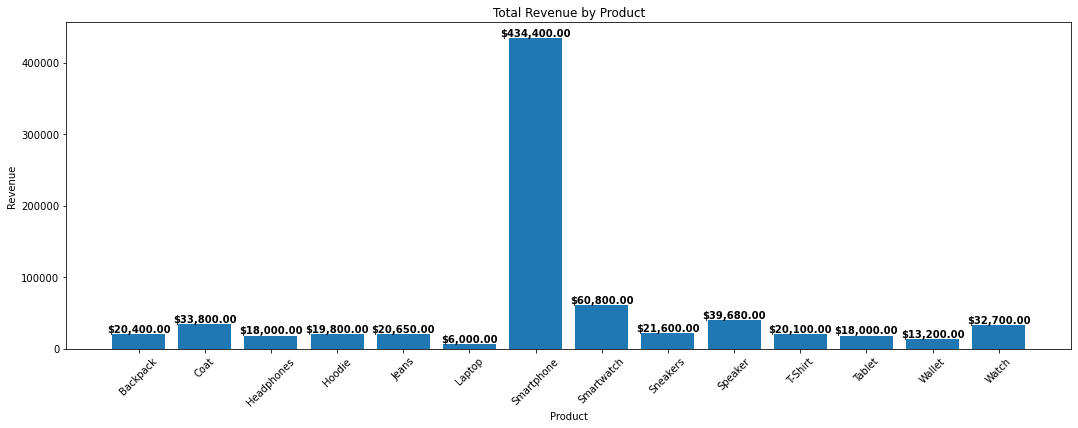

In [105]:
plt.figure(figsize=(18, 6)) # set figure size to 14x6 inches

# create a bar chart
plt.bar(product_revenue.index, product_revenue.values)

# add labels to bars
for i, val in enumerate(product_revenue.values):
    plt.text(i, val, '${:,.2f}'.format(val), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

# set the chart title and axis labels
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the chart
plt.show()


**The product with the highest revenue is Smartphone, which generated 434,400$ in revenue.**

### **What was the average price of a product sold by the company?**

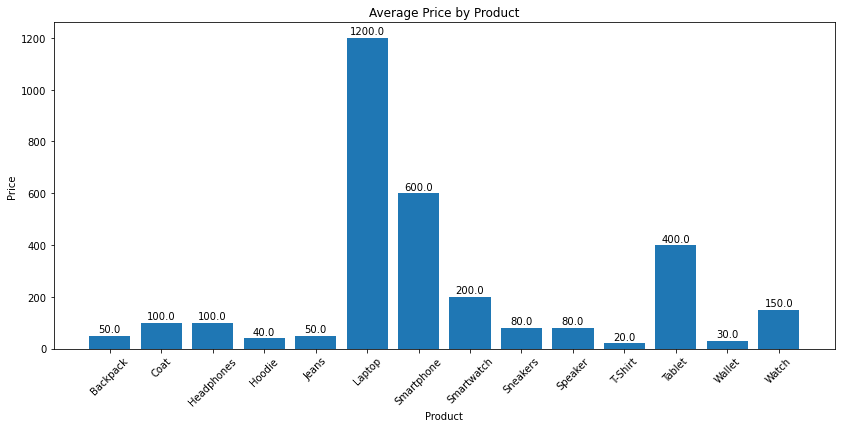

In [106]:
# calculate the average price for each product
product_avg_price = df.groupby('product')['price'].mean()


plt.figure(figsize=(14, 6)) # set figure size to 10x6 inches

# create a bar chart
bar_plot = plt.bar(product_avg_price.index, product_avg_price.values)

# add labels to bars
for i, v in enumerate(product_avg_price.values):
    plt.text(i, v + 5, str(round(v, 2)), ha='center', va='bottom')

# set the chart title and axis labels
plt.title('Average Price by Product')
plt.xlabel('Product')
plt.ylabel('Price')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the chart
plt.show()


### **What was the total quantity of products sold by the company?**

In [107]:
df["quantity"].sum()

5341.0

In [108]:
product_quantity = df.groupby("product")["quantity"].sum()

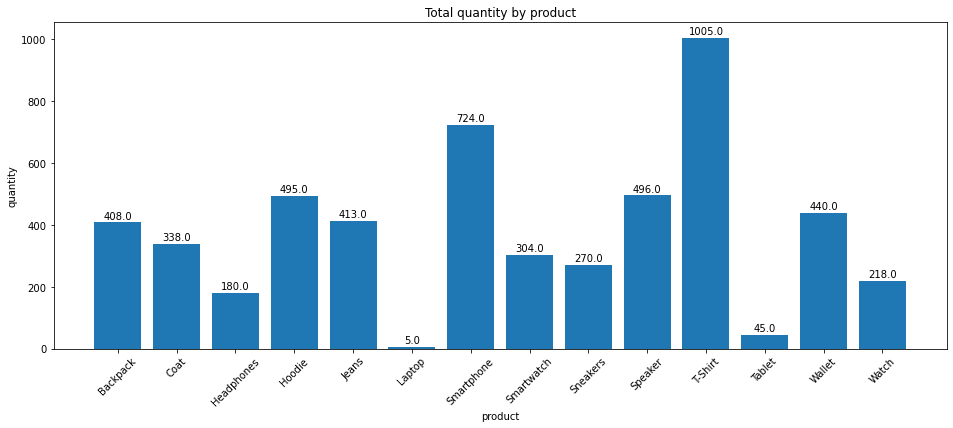

In [109]:
plt.figure(figsize=(16,6))
plt.bar(product_quantity.index, product_quantity.values)

# add labels to bars
for i, v in enumerate(product_quantity.values):
    plt.text(i, v + 5, str(round(v, 2)), ha='center', va='bottom')
    
plt.title("Total quantity by product")
plt.xlabel("product")
plt.ylabel("quantity")

plt.xticks(rotation=45)

plt.show()

### **Which category had the highest revenue? How much revenue did it generate?**



In [110]:
cat_revenue = df.groupby("category")["revenue"].sum()

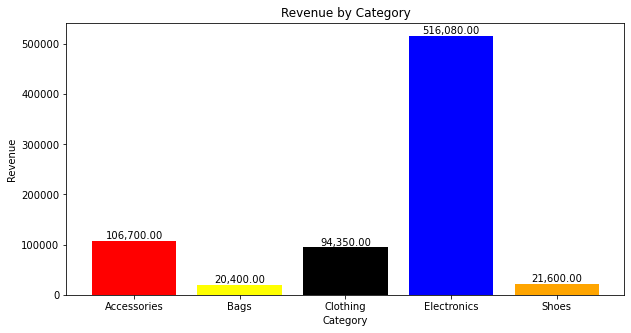

In [111]:
plt.figure(figsize=(10, 5))

c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(cat_revenue.index, cat_revenue.values, color=c)

plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

# Add revenue values on each bar
for i, v in enumerate(cat_revenue.values):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


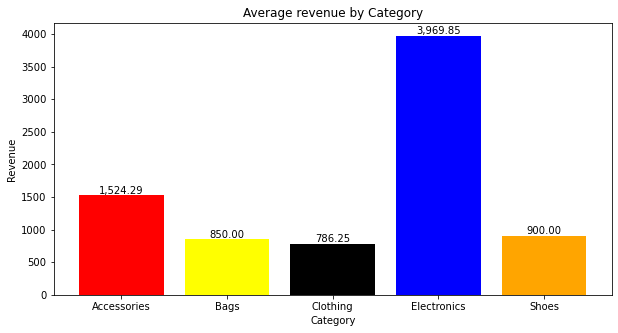

In [112]:
cat_revenue_mean = df.groupby("category")["revenue"].mean()

plt.figure(figsize=(10, 5))

c = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(cat_revenue_mean.index, cat_revenue_mean.values, color=c)

plt.title("Average revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

# Add revenue values on each bar
for i, v in enumerate(cat_revenue_mean.values):
    plt.text(i, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


In [113]:
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


### **What was the average revenue per sale?**

In [114]:
avg_revenue_per_sale = df['revenue'].sum() / df['quantity'].sum()
print('Average revenue per sale:', round(avg_revenue_per_sale,2))


Average revenue per sale: 142.13


### **What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)?**

In [115]:
# group the sales data by quarter and calculate the sum of revenue for each quarter
quarterly_revenue = df.groupby(pd.Grouper(key='date', freq='Q')).sum()['revenue']
quarterly_revenue

date
2022-03-31    182100.0
2022-06-30    185970.0
2022-09-30    197680.0
2022-12-31    193380.0
Freq: Q-DEC, Name: revenue, dtype: float64

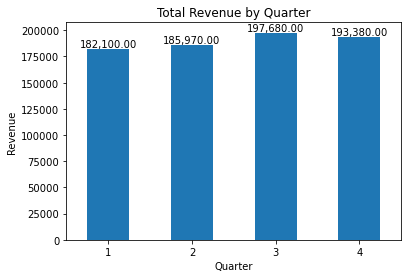

In [116]:
# Extract the quarter from the date column and create a new column for it
df['quarter'] = df['date'].dt.quarter

# Group the data by quarter and sum the revenue column
revenue_by_quarter = df.groupby('quarter')['revenue'].sum()

# Create a bar chart
ax = revenue_by_quarter.plot(kind='bar', rot=0)
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Total Revenue by Quarter')

# Add revenue value on each bar
for i, v in enumerate(revenue_by_quarter):
    ax.text(i, v, f"{v:,.2f}", ha='center', va='bottom', fontsize=10)

# Save the plot as an image file
plt.savefig('revenue_by_quarter.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [117]:
plt.savefig("chart.png")

<Figure size 432x288 with 0 Axes>

In [118]:
df.head()

,date,product,category,price,quantity,revenue,quarter
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0,1
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0,1
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0,1
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0,1
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0,1


### **How has revenue changed over time?**

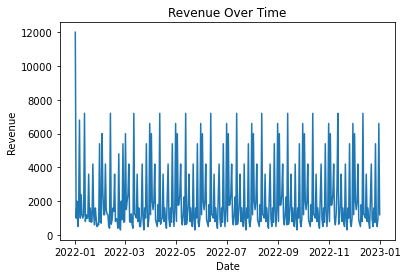

In [119]:
# Group the data by date and sum the revenue column
revenue_by_date = df.groupby('date')['revenue'].sum()

# Plot the revenue data on a line chart
plt.plot(revenue_by_date)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')

# Show the plot
plt.show()

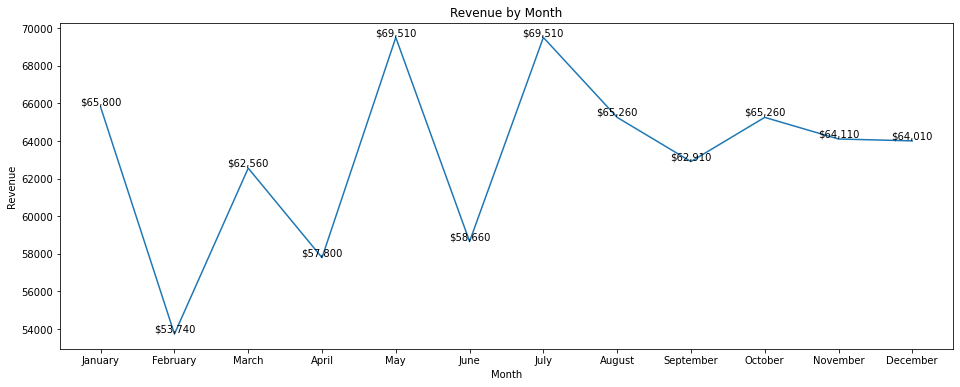

In [120]:
# Group the data by month and sum the revenue column
revenue_by_month = df.groupby(df['date'].dt.strftime('%B'))['revenue'].sum()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the revenue data by the month order
revenue_by_month = revenue_by_month.reindex(month_order)

# Create a line chart of revenue by month
plt.figure(figsize=(16,6))
plt.plot(revenue_by_month)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')

# Add the value of revenue for each month to the line chart
for i, v in enumerate(revenue_by_month):
    plt.text(i, v, "${:,.0f}".format(v), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()
